# ODE-IVP's: Euler Methods
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(x, \mathbf{y}(x))
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}.
\end{equation}


IDEA: discretize variables by letting $x\rightarrow x_{i}$ and $\mathbf{y}(x_{i})\rightarrow \mathbf{y}_{i}$, for $i=0,\ldots,N$. Then use knowledge about $\mathbf{y}_{i}$'s (and possibly derivatives of $\mathbf{y}$) at "earlier" points to approximate (guess) their values at "later" points. An approximate solution is found in this way by "marching" along the independent variable, starting with the given initial values $\mathbf{y}_{0}$ at $x_{0}$.

PRE-REQUISITES:
- [None]

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.
- [4] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.

## 1. The simple Euler method

To start, consider a first-order ODE with one degree of freedom 

\begin{equation}
  y'(x) = f\left(x, y(x)\right)
  \quad,\quad
  \quad\text{with}\quad
  y(x_{0}) = y_{0}.
\end{equation}

Expanding $y(x)$ in a Taylor series about $x_{0}$ gives

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(x_{0}) + \cdots \\
  &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(\xi),
\end{align}

where the second line is exact, for some value of $\xi$ between $x$ and $x_{0}$. Using the differential equation, we can rewrite this as

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})f(x_{0}, y_{0}) + \frac{(x - x_{0})^2}{2!} y''(\xi) \\
  &\approx y(x_{0}) + (x - x_{0})f(x_{0}, y_{0}),
\end{align}


Next we discretize variables by letting $x\rightarrow x_{i}$ and $y(x_{i})\rightarrow y_{i}$, for $i=0,\ldots,N$. (In a more careful treatment, we would use different symbols to denote continuous functions vs their discretized proxies.) Also denote the stepsize $|x_{i+1}-x_{i}|$ by $h$, which we assume to be constant. Then

\begin{align}
  x_{i} &= x_{0} + ih 
  \quad,\quad i = 0,\ldots,N\\
  y_{i+1} &= y_{i} + hf_{i}
  \quad,\quad i = 0,\ldots,N
\end{align}

where $f_{i}\equiv f(x_{i}, y_{i})$. This sets up an iteration scheme. Starting with $x_{0}$ and $y_{0}$, one calculates $f_{0}$, which is then used to calculate $y_{1}$. Then with $x_{1}$ and $y_{1}$ in hand, one repeats this to calculate $y_{2}$, and so on, until the last desired point is reached.

This simple algorithm is often called Euler's method. Here we will call it the **simple Euler method**. Euler's method is an example of an **explicit method** (as opposed to implicit methods), because the right-hand side only involves values of $y(x)$ that have been previously calculated. It is also an example of a **one-step method**, because the right-hand side only involves values of $y(x)$ at a single step other than the current step being calculated.

### Local truncation error vs one-step error

(Terminology in this section follows the discussion in LeVeque, sections 5.4-5.5.)

Every time the above approximation is used, a small error results. This error arises due to truncating the Taylor series, and so is called **local trunctation error**. The local truncation error for the simple Euler method above is given by

\begin{equation}
  \tau_{i+1}
  = \frac{y(x_{i+1}) - y(x_{i})}{h} - f(x_{i}, y_{i})
  = \frac{h}{2}y''(\xi)
  = O(h).
\end{equation}

The local truncation error is therefore $O(h)$, and so the simple Euler method is said to be **first-order accurate**. In general, if the local truncation error of a method is $O(h^p)$, the method is called $p$th-order accurate. 

In addition to the local truncation error, one may also define the **one-step error**. This is the error that arises at one specific step, assuming the solution at the previous step were exact. The one-step error for the simple Euler method above is

\begin{equation}
  \mathcal{L}_{i+1}
  = \left(y(x_{i+1}) - y(x_{i})\right) - hf(x_{i}, y_{i})
  = \frac{h^2}{2}y''(\xi)
  = O(h^2).
\end{equation}

Notice that the one-step error here is $O(h^2)$. In general, a $p$th-order accurate method will have a local truncation error that is $O(h^p)$ and a one-step error that is $O(h^{p+1})$.

### CODE: simple Euler method

In [4]:
%%writefile euler.py
def euler_step(x, y, f, h):
    """ 
    Evolve solution by one step using the simple Euler method
    
    INPUT
    x : current x position
    y : current y values (array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    y_new : new y value
    
    """
    y_new = y + h*f(x,y)
    return y_new

Overwriting euler.py


In [5]:
%run euler.py

### Try it!

Consider the first-order initial value problem

\begin{equation}
  y'(x) = -y(x)
  \quad,\quad
  y(x_{0}) = y_{0}
\end{equation}

One can verify that the exact solution is given by 

\begin{equation}
  y_\mathrm{exact}(x) = y_{0}\exp{(x_{0} - x)}
\end{equation}

Here we will take $y(0)=1.0$, so that the exact solution becomes

\begin{equation}
  y_\mathrm{exact}(x) = e^{-x}
\end{equation}

Compare the solution using the method above with this exact solution. 

<IPython.core.display.Javascript object>


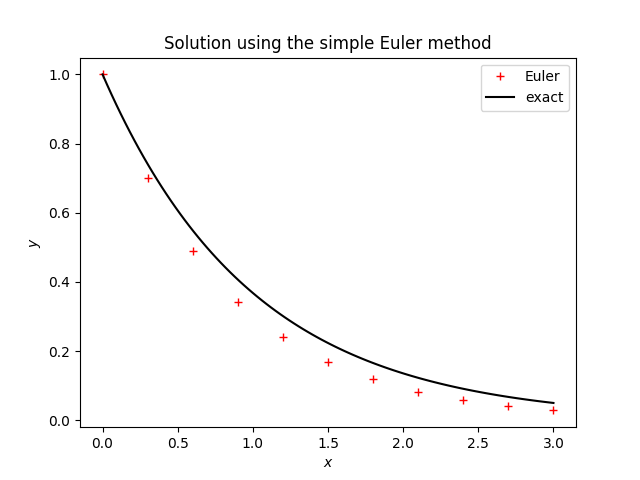

In [7]:
### test ###
import numpy as np 

# rhs function
def f(x,y):
    return -y

# exact solution
def y_exact(x, x0, y0):
    return y0*np.exp(x0)*np.exp(-x)

# initial conditions
x0 = 0.0
y0 = 1.0

# compute stepsize
xmin = x0
xmax = 3.0
nsteps = 10
h = (xmax - xmin)/nsteps

# initialize output arrays
x = np.zeros(nsteps + 1)
y = np.zeros(nsteps + 1)
x[0] = x0
y[0] = y0

# numerical solution
for i in range(0, nsteps):
    x[i+1] = x[i] + h
    y[i+1] = euler_step(x[i], y[i], f, h)

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'r+', markersize=6, markeredgewidth=1, markerfacecolor='none', label='Euler')
xx = np.linspace(xmin, xmax, 100)
ax.plot(xx, y_exact(xx, x0, y0), 'k-', label='exact')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Solution using the simple Euler method")
ax.legend(loc="upper right", numpoints=1)
fig.show()

## 2. Midpoint Euler method

[TERMINOLOGY: DeVries and Hasbun call this the "modified Euler" method (see section 5.1); Burden and Faires call this the "midpoint" method (see section 5.4); see also Garcia, section 3.2.]

The simple Euler method solved the first-order differential equation

\begin{equation}
  y'(x_{i}) = f(x_{i}, y(x_{i}))
  \quad,\quad
  y(x_{0}) = y_{0}
\end{equation}

by using the approximation

\begin{equation}
  y(x_{i+1}) \approx y(x_{i}) + hf(x_{i}, y(x_{i})).
\end{equation}

The value of $y(x)$ at each point is calculated based on $y'(x_{i})$, the slope of $y(x)$ at the previous point. An improvement would be to base each step on the slope at the *midpoint* between the current point and the previous point. That is

\begin{equation}
  y(x_{i+1}) \approx y(x_{i}) + hf(x_\text{mid}, y(x_\text{mid})),
\end{equation}

where $x_\text{mid}=x_{i}+\tfrac{h}{2}$ and $y_\text{mid}$ can be approximated using the simple Euler method

\begin{equation}
  y(x_\text{mid}) \approx y(x_{i}) + \frac{h}{2}f(x_{i}, y(x_{i})).
\end{equation}

The midpoint Euler formula then becomes

\begin{equation}
  y_{i+1} = y_{i} + h\,f\left(x_{i} + \frac{h}{2}\,\,,\,\, y_{i} + \frac{h}{2}f_{i}\right).
\end{equation}

[NOTE: This is an example of a second-order Runge-Kutta method. (see [ode-solve-rk-theory.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-rk-theory.ipynb))]

### CODE: midpoint Euler method

In [8]:
%%writefile euler_midpt.py
def euler_midpt_step(x, y, f, h):
    """ 
    Evolve solution by one step using the midpoint Euler method
    (a.k.a., second-order Runge-Kutta with a1=0, a2=1, b2=1/2, c2=1/2)
    
    INPUT
    x : current x position
    y : current y values (array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    y_new : new y value
    """
    x_mid = x + 0.5*h
    y_mid = y + 0.5*h*f(x,y)
    y_new = y + h*f(x_mid, y_mid)
    return y_new

Overwriting euler_midpt.py


In [9]:
%run euler_midpt.py

## 3. Mean-value Euler method

[TERMINOLOGY: DeVries and Hasbun call this the "improved Euler" method (see section 5.1); Burden and Faires call this the "modified Euler" method (see section 5.4); see also Garcia, section 3.2.]

The simple Euler method bases each step on the slope of the function at the previous point. The midpoint Euler method bases each step on the slope of the function at the midpoint between the previous point and the next point. Yet another variation is to base each step on the average between the slopes at the previous and next points. That is

\begin{equation}
  y(x_{i+1}) \approx y(x_{i}) + h\frac{f(x_{i}, y(x_{i})) + f(x_{i+1}, y(x_{i+1}))}{2},
\end{equation}

where $x_\text{i+1}=x_{i}+h$ and $y_\text{i+1}$ can be approximated using the simple Euler method

\begin{equation}
  y(x_{i+1}) \approx y(x_{i}) + hf(x_{i}, y(x_{i})).
\end{equation}

The mean-value Euler formula then becomes

\begin{equation}
  y_{i+1} = y_{i} + \frac{1}{2}h\left[f_{i} + f\left(x_{i} + h\,,\, y_{i} + h\,f_{i}\right)\right].
\end{equation}

[NOTE: This is another example of a second-order Runge-Kutta method. (see [ode-solve-rk-theory.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-rk-theory.ipynb))]

### CODE: mean-value Euler method

In [10]:
%%writefile euler_meanval.py
def euler_meanval_step(x, y, f, h):
    """ 
    Evolve solution by one step using the mean-value Euler method
    (a.k.a., second-order Runge-Kutta with a1=1/2, b1=1, c1=1, a2=1/2, b2=1, c2=1)
    
    INPUT
    x : current x position
    y : current y values (array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    y_new : new y value
    """
    f_i = f(x,y)
    f_i_plus_1 = f(x + h, y + h*f_i)
    y_new = y + 0.5*h*(f_i + f_i_plus_1)
    return y_new

Overwriting euler_meanval.py


In [11]:
%run euler_meanval.py

## 4. Comparison test

[The following analytic example is used repeatedly throughout Burden and Faires, chapter 5]

Consider the first-order initial value problem

\begin{equation}
  y'(x) = y(x) - x^2 + 1
  \quad,\quad
  y(x_{0}) = y_{0}
\end{equation}

One can verify that the exact solution is given by 

\begin{equation}
  y_\mathrm{exact}(x) = (x + 1)^2 + \left[y_{0} - (x_{0}+1)^2\right]\exp{(x-x_{0})}
\end{equation}

Here we will take $y(0)=0.5$, so that the exact solution becomes

\begin{equation}
  y_\mathrm{exact}(x) = (x + 1)^2 - \frac{1}{2}e^x
\end{equation}

Compare the solutions using the various methods above with this exact solution. 

<IPython.core.display.Javascript object>


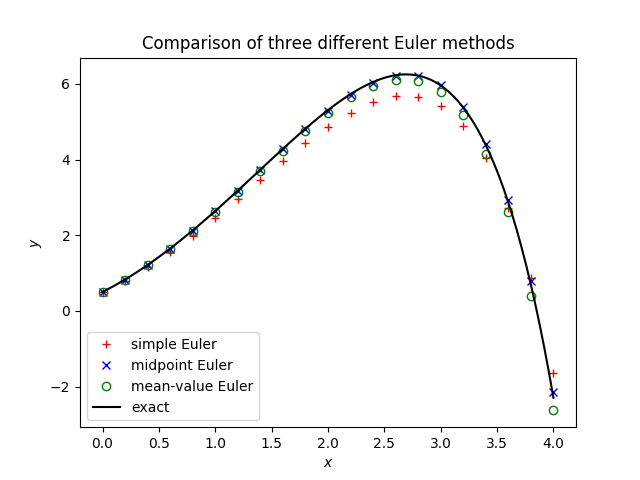

In [12]:
### comparison test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def y_exact(x, x0 ,y0):
    return (x + 1)**2 + (y0 - (x0 + 1)**2)*np.exp(x - x0)

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsize
xmin = x0
xmax = 4.0
nsteps = 20
h = (xmax - xmin)/nsteps

# initialize output arrays
x = np.zeros(nsteps + 1)
x[0] = x0

y_eul = np.zeros_like(x)
y_eul[0] = y0

y_mid = np.zeros_like(x)
y_mid[0] = y0

y_mv = np.zeros_like(x)
y_mv[0] = y0

# numerical solution
for i in range(0, nsteps):
    x[i+1] = x[i] + h
    y_eul[i+1] = euler_step(x[i], y_eul[i], f, h)
    y_mid[i+1] = euler_midpt_step(x[i], y_mid[i], f, h)
    y_mv[i+1] = euler_meanval_step(x[i], y_mv[i], f, h)

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots(1,1)
ax.plot(x, y_eul, 'r+', markersize=6, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax.plot(x, y_mid, 'bx', markersize=6, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax.plot(x, y_mv, 'go', markersize=6, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
xx = np.linspace(xmin, xmax, 100)
ax.plot(xx, y_exact(xx, x0, y0), 'k-', label='exact')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Comparison of three different Euler methods")
ax.legend(loc="lower left", numpoints=1)
fig.show()

## 5. Convergence

[This section follows the discussion in LeVeque, appendix A]

A measure of error $\mathcal{E}(h)$ can be defined over a grid as

\begin{equation}
  \mathcal{E}(h) = ||F(h) - \hat{F}(h)||, 
\end{equation}

where $F(h)$ is the numerical solution, $\hat{F}(h)$ is the exact solution, and the norm here can be any of the many available notions of norm (see LeVeque, appendix A). By definition, $\mathcal{E}(h)$ depends on the stepsize $h$. In general, we expect a power law relationship:

\begin{equation}
  \mathcal{E}(h) = C h^p,
\end{equation}

where $C$ is a constant. We can measure the **convergence rate** $p$, by using

\begin{equation}
  \log\left(\mathcal{E}\right) = p\,\log\left(h\right) + \log{C}.
\end{equation}

Plotting $\mathcal{E}$ versus $h$ on a logarithmic scale, the convergence rate $p$ will be the slope of the best-fit line.

For the simple Euler method, we expect the one-step error to scale with $p=2$.

<IPython.core.display.Javascript object>


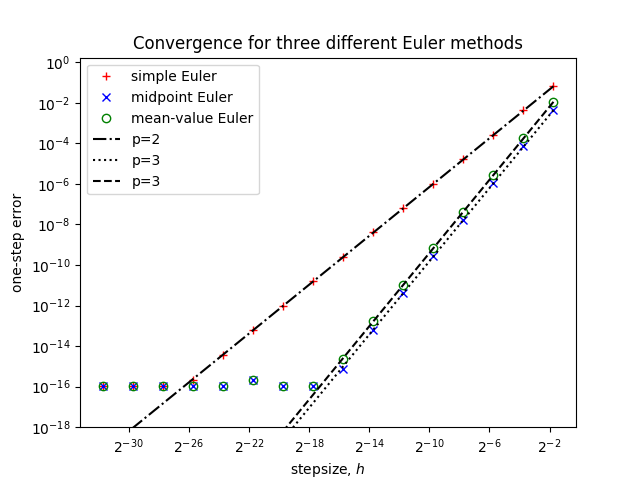

In [13]:
### convergence test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def y_exact(x, x0 ,y0):
    return (x + 1)**2 + (y0 - (x0 + 1)**2)*np.exp(x - x0)

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsizes
xmin = x0
xmax = 3.0
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 30, 16, base=2)
hvals = (xmax - xmin)/nsteps

# initialize one-step error arrays
err_eul = np.zeros_like(hvals)
err_mid = np.zeros_like(hvals)
err_mv = np.zeros_like(hvals)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)):

    # step-size 
    h = hvals[i]

    # initialize output arrays
    x = np.zeros(2)
    x[0] = x0

    y_eul = np.zeros_like(x)
    y_eul[0] = y0

    y_mid = np.zeros_like(x)
    y_mid[0] = y0

    y_mv = np.zeros_like(x)
    y_mv[0] = y0

    
    # numerical solutions
    x[1] = x[0] + h
    y_eul[1] = euler_step(x[0], y_eul[0], f, h)
    y_mid[1] = euler_midpt_step(x[0], y_mid[0], f, h)
    y_mv[1] = euler_meanval_step(x[0], y_mv[0], f, h)

    # calculate one-step errors
    err_eul[i] = np.abs(y_eul[1] - y_exact(x[1], x0, y0))
    err_mid[i] = np.abs(y_mid[1] - y_exact(x[1], x0, y0))
    err_mv[i] = np.abs(y_mv[1] - y_exact(x[1], x0, y0))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals, err_eul, 'r+', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax1.loglog(hvals, err_mid, 'bx', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax1.loglog(hvals, err_mv, 'go', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
ax1.loglog(hvals, err_eul[0]*(hvals/hvals[0])**2, 'k-.', label='p=2')
ax1.loglog(hvals, err_mid[0]*(hvals/hvals[0])**3, 'k:', label='p=3')
ax1.loglog(hvals, err_mv[0]*(hvals/hvals[0])**3, 'k--', label='p=3')
ax1.set_xscale('log', basex=2)
ax1.set_xlabel(r"stepsize, $h$")
ax1.set_ylabel(r"one-step error")
ax1.set_ylim(1e-18)
ax1.set_title("Convergence for three different Euler methods")
ax1.legend(loc="upper left", numpoints=1)
fig.show()

## 6. Self-convergence

[This section follows the discussion in LeVeque, appendix A]

In general we do not know the exact solution. In that case we use **self convergence** to measure the convergence rate. By definition, the error $\mathcal{E}(h)$ is a function of the stepsize, as is our numerical approximation of the thing we're trying to compute $F(h)$. Therefore we can write

\begin{equation}
  F(h) = F(0) + \mathcal{E}(h),
\end{equation}

where $F(0)$ is the exact solution. By subtracting any two approximations we can eliminate the exact solution. Using the power law dependence

\begin{equation}
  \mathcal{E}(h) = C h^p
\end{equation}

this gives

\begin{align}
  F(h) - F(h/\alpha) 
  &= \left[F(0) + \mathcal{E}(h)\right] - \left[F(0) + \mathcal{E}(h/\alpha)\right] \\
  &= F(0) + C h^p - F(0) - C (h/\alpha)^p \\
  &= C h^p\left(1 - \frac{1}{\alpha^p}\right)
\end{align}

We still do not know the value of the constant $C$. However, we can use a third approximation $F(h/\alpha^2)$ to eliminate it

\begin{align}
  F(h/\alpha) - F(h/\alpha^2)
  &= \left[F(0) + \mathcal{E}(h/\alpha)\right] - \left[F(0) + \mathcal{E}(h/\alpha^2)\right] \\
  &= F(0) + C(h/\alpha)^p - F(0) - C(h/\alpha^2)^p \\
  &= \frac{C h^p}{\alpha^p}\left(1 - \frac{1}{\alpha^p}\right)
\end{align}

and then take the ratio

\begin{equation}
  \frac{F(h) - F(h/\alpha)}{F(h/\alpha) - F(h/\alpha^2)} 
  = \alpha^p
\end{equation}

So the **self-convergence rate** is

\begin{equation}
  p = \log_{\alpha} \left|\frac{F(h) - F(h/\alpha)}{F(h/\alpha) - F(h/\alpha^2)}\right|.
\end{equation}

[Note to simplify the resulting expression, we chose the same ratio $\alpha$ between the first two resolutions as between the last two. A more complicated expression can be obtained without making this assumption.]

The typical choice is $\alpha=2$. In that case 

\begin{equation}
  \frac{F(h) - F(h/2)}{F(h/2) - F(h/4)} 
  = 2^p
\end{equation}

so that the self-convergence rate is

\begin{equation}
  p = \log_{2} \left|\frac{F(h) - F(h/2)}{F(h/2) - F(h/4)}\right|.
\end{equation}

For the simple Euler method, we expect the one-step error to scale with $p=2$.

<IPython.core.display.Javascript object>


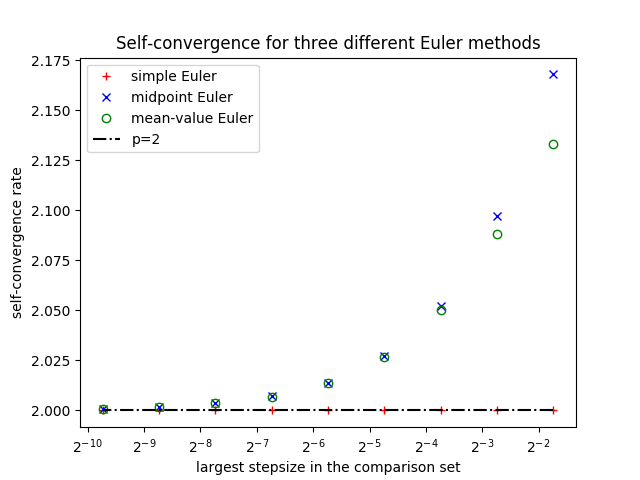

In [22]:
### self-convergence test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsizes
xmin = x0
xmax = 3.0
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 10, 11, base=2)
hvals = (xmax - xmin)/nsteps

# initialize error-ratio arrays
ratio_eul = np.zeros_like(hvals[0:-2])
ratio_mid = np.zeros_like(hvals[0:-2])
ratio_mv = np.zeros_like(hvals[0:-2])

# calculate error-ratio for different resolutions
for i in range(0, len(hvals)-2):

    # define three different stepsizes (resolutions)
    h1 = hvals[i]
    h2 = hvals[i+1]
    h4 = hvals[i+2]
        
    # numerical solutions at the three different resolutions
    x1 = x0 + h1
    y1_eul = euler_step(x0, y0, f, h1)
    y1_mid = euler_midpt_step(x0, y0, f, h1)
    y1_mv = euler_meanval_step(x0, y0, f, h1)

    x2 = x0 + h2    
    y2_eul = euler_step(x0, y0, f, h2)
    y2_mid = euler_midpt_step(x0, y0, f, h2)
    y2_mv = euler_meanval_step(x0, y0, f, h2)

    x4 = x0 + h4    
    y4_eul = euler_step(x0, y0, f, h4)
    y4_mid = euler_midpt_step(x0, y0, f, h4)
    y4_mv = euler_meanval_step(x0, y0, f, h4)

    # calculate error-ratios
    ratio_eul[i] = np.abs((y1_eul - y2_eul)/(y2_eul - y4_eul))
    ratio_mid[i] = np.abs((y1_mid - y2_mid)/(y2_mid - y4_mid))
    ratio_mv[i] = np.abs((y1_mv - y2_mv)/(y2_mv - y4_mv))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals[0:-2], ratio_eul, 'r+', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax1.loglog(hvals[0:-2], ratio_mid, 'bx', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax1.loglog(hvals[0:-2], ratio_mv, 'go', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
ax1.loglog(hvals[0:-2], 2*np.ones_like(ratio_eul), 'k-.', label='p=2')
ax1.set_xscale('log', basex=2)
ax1.set_yscale('linear')
ax1.set_xlabel(r"largest stepsize in the comparison set")
ax1.set_ylabel(r"self-convergence rate")
ax1.set_title("Self-convergence for three different Euler methods")
ax1.legend(loc="upper left", numpoints=1)
fig.show()